In [1]:
import pandas as pd
import numpy as np
import neattext as nt
import neattext.functions as nfx
import string
import text2emotion as te
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sio
import math
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.mixture import GaussianMixture
from plotnine import *
from sklearn.metrics import silhouette_score
%matplotlib inline
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv("Spritzer.csv", header=None)
df

,0,1,2,3
0,2021-06-10 08:33:20,1402906716564492289,ann täpp,"b'Vintage diffuser, Pitcher with diffuser, Lit..."
1,2021-06-10 05:49:29,1402865480155738114,Linz,"b'RT @Zic_mabz: Personally, I don\xe2\x80\x99t..."
2,2021-06-10 05:43:28,1402863967072964611,Dave Ross,b'@Norton QuickGrabMorton before she \xe2\x80\...
3,2021-06-10 05:43:14,1402863908529049606,AmericaFirstConservative,b'@Scotty_the_Pug @boiledpotato550 @NBCNews El...
4,2021-06-10 04:55:32,1402851906746294276,villanelle,"b'RT @Zic_mabz: Personally, I don\xe2\x80\x99t..."
...,...,...,...,...
651,2021-06-11 00:39:22,1403149826037063681,Britney Spears,b'@circum_centrist Keeps shaking lemon spritze...
652,2021-06-11 00:38:40,1403149649863655425,Olathe West Track,"b""And a proud coach moment...On the way to tre..."
653,2021-06-11 00:17:09,1403144237273665539,💧Sir Evadregand,b'@rebeccamillar83 These ones are about 2 year...
654,2021-06-11 00:15:45,1403143880975863813,julie,b'yasss lavender peach redbull spritzer to hel...


In [3]:
df = df.drop(df.columns[[0, 1, 2]], axis=1)
df

,3
0,"b'Vintage diffuser, Pitcher with diffuser, Lit..."
1,"b'RT @Zic_mabz: Personally, I don\xe2\x80\x99t..."
2,b'@Norton QuickGrabMorton before she \xe2\x80\...
3,b'@Scotty_the_Pug @boiledpotato550 @NBCNews El...
4,"b'RT @Zic_mabz: Personally, I don\xe2\x80\x99t..."
...,...
651,b'@circum_centrist Keeps shaking lemon spritze...
652,"b""And a proud coach moment...On the way to tre..."
653,b'@rebeccamillar83 These ones are about 2 year...
654,b'yasss lavender peach redbull spritzer to hel...


In [4]:
df.columns=['text']

In [5]:
df[~df.duplicated()].to_csv('Spritzer(NoDup).csv', header=True, index=False, encoding='utf-8-sig')
df

,text
0,"b'Vintage diffuser, Pitcher with diffuser, Lit..."
1,"b'RT @Zic_mabz: Personally, I don\xe2\x80\x99t..."
2,b'@Norton QuickGrabMorton before she \xe2\x80\...
3,b'@Scotty_the_Pug @boiledpotato550 @NBCNews El...
4,"b'RT @Zic_mabz: Personally, I don\xe2\x80\x99t..."
...,...
651,b'@circum_centrist Keeps shaking lemon spritze...
652,"b""And a proud coach moment...On the way to tre..."
653,b'@rebeccamillar83 These ones are about 2 year...
654,b'yasss lavender peach redbull spritzer to hel...


In [6]:
df = pd.read_csv("Spritzer(NoDup).csv", encoding = 'utf-8', error_bad_lines = False)

In [7]:
def cleanUpTweet(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    txt = re.sub(r'#', '', txt)
    txt = re.sub(r'RT : ', '', txt)
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

In [8]:
df['text'] = [word.lower() for word in df['text']]
df['text']

0      b'vintage diffuser, pitcher with diffuser, lit...
1      b'rt @zic_mabz: personally, i don\xe2\x80\x99t...
2      b'@norton quickgrabmorton before she \xe2\x80\...
3      b'@scotty_the_pug @boiledpotato550 @nbcnews el...
4      b'@o2farms_sk @noisyrandy @darylfransoo @bigmo...
                             ...                        
504           b'i\xe2\x80\x99m a redbull spritzer whore'
505    b'@circum_centrist keeps shaking lemon spritze...
506    b"and a proud coach moment...on the way to tre...
507    b'@rebeccamillar83 these ones are about 2 year...
508    b'yasss lavender peach redbull spritzer to hel...
Name: text, Length: 509, dtype: object

In [9]:
df['text'] = df['text'].apply(cleanUpTweet)

In [10]:
df['text'] = df['text'].apply(nfx.remove_userhandles)

In [11]:
# Remove Hashtags
df['text'] = df['text'].apply(nfx.remove_hashtags)

In [12]:
# Remove Custom Pattern
df['text'] = df['text'].apply(lambda x: nfx.remove_custom_pattern(x, term_pattern=r'&#\S+'))

In [13]:
df['text'] = df['text'].apply(lambda x: nfx.remove_custom_pattern(x, term_pattern=r'b"'))
df['text'] = df['text'].apply(lambda x: nfx.remove_custom_pattern(x, term_pattern=r"b'"))
df['text'] = df['text'].apply(lambda x: nfx.remove_custom_pattern(x, term_pattern=r"rt"))
df['text'] = df['text'].apply(nfx.remove_special_characters)

In [14]:
df['text'] = df['text'].apply(nfx.remove_multiple_spaces)

In [15]:
# Remove Stopwords
# Method using Neattext.Functions
df['text'] = df['text'].apply(nfx.remove_stopwords)

In [16]:
import googletrans
from googletrans import Translator
from googletrans import LANGUAGES

In [17]:
translator = Translator()
translations = {}
for column in df.columns:
    unique = df[column].unique()
    for element in unique:
        try:
            translations[element] = translator.translate(element).text
        except AttributeError:
            print("Error")
for i in translations.items():
    print(i)

('vintage diffuser pitcher diffuser little flower spritzer spray bottle atomizer bronze aromatherapy diffusxe2x80xa6', 'vintage diffuser pitcher diffuser little flower spritzer spray bottle atomizer bronze aromatherapy diffusxe2x80xa6')
('personally donxe2x80x99t think therexe2x80x99s cider tastes better brutal fruit ruby apple spritzernnargue savanna noxe2x80xa6', 'personally donxe2x80x99t think therexe2x80x99s cider tastes better brutal fruit ruby apple spritzernnargue savanna noxe2x80xa6')
('quickgrabmo xe2x80x98looses saltxe2x80x99 like time counter everytimexe2x80xa6', 'quickgrabmo xe2x80x98looses saltxe2x80x99 like time counter everytimexe2x80xa6')
('elliot spritzer paid sex anthony wiener sent dick pics thatxe2x80x99s deviant', 'elliot spritzer paid sex anthony wiener sent dick pics thatxe2x80x99s deviant')
('assume randy stumble trailer wine sxe2x80xa6', 'assume randy stumble trailer wine sxe2x80xa6')
('randy nice like guy wine spritzer chat', 'randy nice like guy wine spritzer

In [18]:
df.replace(translations, inplace=True)
print(df)

                                                  text
0    vintage diffuser pitcher diffuser little flowe...
1    personally donxe2x80x99t think therexe2x80x99s...
2    quickgrabmo xe2x80x98looses saltxe2x80x99 like...
3    elliot spritzer paid sex anthony wiener sent d...
4         assume randy stumble trailer wine sxe2x80xa6
..                                                 ...
504                 ixe2x80x99m redbull spritzer whore
505                   keeps shaking lemon spritzer bed
506  proud coach momenton way treat camp coaches ni...
507  ones 2 years old bad seasons meant struggled t...
508  yasss lavender peach redbull spritzer help ass...

[509 rows x 1 columns]


In [19]:
def getTextEmotion(txt):
    return te.get_emotion(txt)

In [20]:
df['Emotion'] = df['text'].apply(getTextEmotion)

In [21]:
df.to_csv('Test8.csv', header=True, index=False, encoding='utf-8-sig')

In [2]:
df = pd.read_csv("Test8.csv", encoding = 'utf-8', error_bad_lines = False)

In [3]:
df

,text,Emotion
0,vintage diffuser pitcher diffuser little flowe...,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
1,personally donxe2x80x99t think therexe2x80x99s...,"{'Happy': 0.25, 'Angry': 0.25, 'Surprise': 0.5..."
2,quickgrabmo xe2x80x98looses saltxe2x80x99 like...,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
3,elliot spritzer paid sex anthony wiener sent d...,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
4,assume randy stumble trailer wine sxe2x80xa6,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':..."
...,...,...
504,ixe2x80x99m redbull spritzer whore,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':..."
505,keeps shaking lemon spritzer bed,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':..."
506,proud coach momenton way treat camp coaches ni...,"{'Happy': 0.5, 'Angry': 0.0, 'Surprise': 0.25,..."
507,ones 2 years old bad seasons meant struggled t...,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ..."


In [4]:
df.Emotion.str.split(expand=True)

,0,1,2,3,4,5,6,7,8,9
0,{'Happy':,"0.0,",'Angry':,"0.0,",'Surprise':,"0.0,",'Sad':,"0.0,",'Fear':,1.0}
1,{'Happy':,"0.25,",'Angry':,"0.25,",'Surprise':,"0.5,",'Sad':,"0.0,",'Fear':,0.0}
2,{'Happy':,"0.0,",'Angry':,"0.0,",'Surprise':,"0.0,",'Sad':,"1.0,",'Fear':,0.0}
3,{'Happy':,"0.0,",'Angry':,"0.0,",'Surprise':,"0.0,",'Sad':,"0.0,",'Fear':,1.0}
4,{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0}
...,...,...,...,...,...,...,...,...,...,...
504,{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0}
505,{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0}
506,{'Happy':,"0.5,",'Angry':,"0.0,",'Surprise':,"0.25,",'Sad':,"0.0,",'Fear':,0.25}
507,{'Happy':,"0.0,",'Angry':,"0.0,",'Surprise':,"0.0,",'Sad':,"0.5,",'Fear':,0.5}


In [5]:
#Split emotion cloumn into many emotion
df[['Happy_Text','Happy_Value', 'Angry_Text', 'Angry_Value', 
    'Surprise_Text', 'Surprise_Value', 'Sad_Text', 'Sad_Value', 
    'Fear_Text', 'Fear_Value']] = df.Emotion.str.split(" ",expand=True)
df

,text,Emotion,Happy_Text,Happy_Value,Angry_Text,Angry_Value,Surprise_Text,Surprise_Value,Sad_Text,Sad_Value,Fear_Text,Fear_Value
0,vintage diffuser pitcher diffuser little flowe...,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",{'Happy':,"0.0,",'Angry':,"0.0,",'Surprise':,"0.0,",'Sad':,"0.0,",'Fear':,1.0}
1,personally donxe2x80x99t think therexe2x80x99s...,"{'Happy': 0.25, 'Angry': 0.25, 'Surprise': 0.5...",{'Happy':,"0.25,",'Angry':,"0.25,",'Surprise':,"0.5,",'Sad':,"0.0,",'Fear':,0.0}
2,quickgrabmo xe2x80x98looses saltxe2x80x99 like...,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",{'Happy':,"0.0,",'Angry':,"0.0,",'Surprise':,"0.0,",'Sad':,"1.0,",'Fear':,0.0}
3,elliot spritzer paid sex anthony wiener sent d...,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",{'Happy':,"0.0,",'Angry':,"0.0,",'Surprise':,"0.0,",'Sad':,"0.0,",'Fear':,1.0}
4,assume randy stumble trailer wine sxe2x80xa6,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0}
...,...,...,...,...,...,...,...,...,...,...,...,...
504,ixe2x80x99m redbull spritzer whore,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0}
505,keeps shaking lemon spritzer bed,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0}
506,proud coach momenton way treat camp coaches ni...,"{'Happy': 0.5, 'Angry': 0.0, 'Surprise': 0.25,...",{'Happy':,"0.5,",'Angry':,"0.0,",'Surprise':,"0.25,",'Sad':,"0.0,",'Fear':,0.25}
507,ones 2 years old bad seasons meant struggled t...,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",{'Happy':,"0.0,",'Angry':,"0.0,",'Surprise':,"0.0,",'Sad':,"0.5,",'Fear':,0.5}


In [6]:
#Clean symbol
df['Happy'] = df['Happy_Value'].str.replace(",", " ")
df['Angry'] = df['Angry_Value'].str.replace(",", " ")
df['Surprise'] = df['Surprise_Value'].str.replace(",", " ")
df['Sad'] = df['Sad_Value'].str.replace(",", " ")
df['Fear'] = df['Fear_Value'].str.replace("}", " ")
df

<ipython-input-6-684cd2f9155c>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


,text,Emotion,Happy_Text,Happy_Value,Angry_Text,Angry_Value,Surprise_Text,Surprise_Value,Sad_Text,Sad_Value,Fear_Text,Fear_Value,Happy,Angry,Surprise,Sad,Fear
0,vintage diffuser pitcher diffuser little flowe...,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",{'Happy':,"0.0,",'Angry':,"0.0,",'Surprise':,"0.0,",'Sad':,"0.0,",'Fear':,1.0},0.0,0.0,0.0,0.0,1.0
1,personally donxe2x80x99t think therexe2x80x99s...,"{'Happy': 0.25, 'Angry': 0.25, 'Surprise': 0.5...",{'Happy':,"0.25,",'Angry':,"0.25,",'Surprise':,"0.5,",'Sad':,"0.0,",'Fear':,0.0},0.25,0.25,0.5,0.0,0.0
2,quickgrabmo xe2x80x98looses saltxe2x80x99 like...,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",{'Happy':,"0.0,",'Angry':,"0.0,",'Surprise':,"0.0,",'Sad':,"1.0,",'Fear':,0.0},0.0,0.0,0.0,1.0,0.0
3,elliot spritzer paid sex anthony wiener sent d...,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",{'Happy':,"0.0,",'Angry':,"0.0,",'Surprise':,"0.0,",'Sad':,"0.0,",'Fear':,1.0},0.0,0.0,0.0,0.0,1.0
4,assume randy stumble trailer wine sxe2x80xa6,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0},0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,ixe2x80x99m redbull spritzer whore,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0},0,0,0,0,0
505,keeps shaking lemon spritzer bed,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0},0,0,0,0,0
506,proud coach momenton way treat camp coaches ni...,"{'Happy': 0.5, 'Angry': 0.0, 'Surprise': 0.25,...",{'Happy':,"0.5,",'Angry':,"0.0,",'Surprise':,"0.25,",'Sad':,"0.0,",'Fear':,0.25},0.5,0.0,0.25,0.0,0.25
507,ones 2 years old bad seasons meant struggled t...,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",{'Happy':,"0.0,",'Angry':,"0.0,",'Surprise':,"0.0,",'Sad':,"0.5,",'Fear':,0.5},0.0,0.0,0.0,0.5,0.5


In [7]:
df = df[['Happy','Angry', 'Surprise', 'Sad', 'Fear']]

In [8]:
df

,Happy,Angry,Surprise,Sad,Fear
0,0.0,0.0,0.0,0.0,1.0
1,0.25,0.25,0.5,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0,0,0,0,0
...,...,...,...,...,...
504,0,0,0,0,0
505,0,0,0,0,0
506,0.5,0.0,0.25,0.0,0.25
507,0.0,0.0,0.0,0.5,0.5


In [8]:
# Create a multivariate Gaussian distribution instance with 2 clusters: model
gmm = GaussianMixture(n_components=2)

# Fit model to points
gmm.fit(df)

# Determine the cluster labels of new_points: labels
label = gmm.fit_predict(df)

In [28]:
label

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [29]:
z = pd.DataFrame(data=label)
print(z)
z.to_csv("Test9.csv", header=True, index=False, encoding='utf-8-sig')

     0
0    0
1    1
2    1
3    0
4    0
..  ..
504  0
505  0
506  1
507  1
508  1

[509 rows x 1 columns]


In [9]:
y = pd.read_csv("Test9.csv", encoding = 'utf-8', error_bad_lines= False)
y

,0
0,0
1,1
2,1
3,0
4,0
...,...
504,0
505,0
506,1
507,1


In [10]:
x = df

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=31)

In [12]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


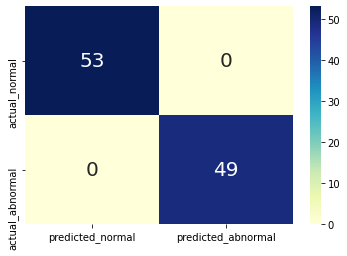

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['predicted_normal', 'predicted_abnormal'], yticklabels=['actual_normal', 'actual_abnormal'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

NBscore = gnb.score(x_test, y_test)

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=31)

In [50]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


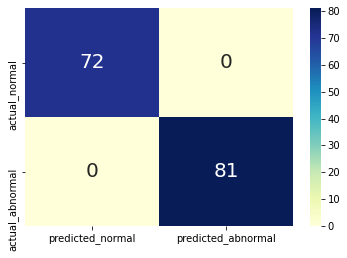

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['predicted_normal', 'predicted_abnormal'], yticklabels=['actual_normal', 'actual_abnormal'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

NBscore = gnb.score(x_test, y_test)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [15]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


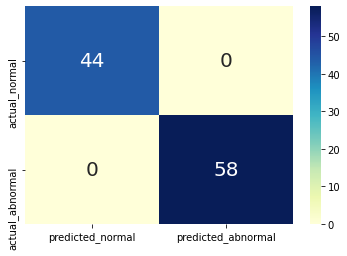

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['predicted_normal', 'predicted_abnormal'], yticklabels=['actual_normal', 'actual_abnormal'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

In [53]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


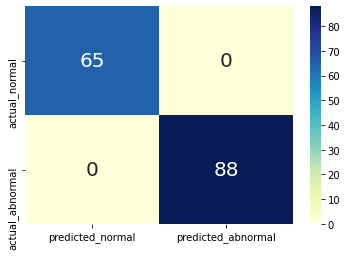

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['predicted_normal', 'predicted_abnormal'], yticklabels=['actual_normal', 'actual_abnormal'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))